In [17]:
from __future__ import print_function

import pandas as pd 
import numpy as np 
import sklearn

# NLTK/NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.collocations import *
import gensim

# Classifiers 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split


#Sampling
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

import sklearn.decomposition as decomposition

#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

Using TensorFlow backend.


In [2]:
%run custom_functions_2.ipynb

## Data Visualization

In [3]:
!ls

Data Cleaning-TrumpTwitter.ipynb
Dataset2-Cleaning.ipynb
Dataset2-Notebook.ipynb
Study2-Data Exploration-Visualizations.ipynb
Trump-Twitter-Practice.ipynb
custom_functions_2.ipynb
data2-cleaned.csv
dataset2.csv
trump_tweet.csv


In [19]:
df = pd.read_csv('data2-cleaned.csv')

df.head(20)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldn complain about cleaning your hou...,woman shouldn complain about cleaning your hou...,"['woman', 'shouldn', 'complain', 'about', 'cle...","['woman', 'shouldn', 'complain', 'about', 'cle...","['woman', 'shouldn', 'complain', 'about', 'cle...",woman shouldn complain about cleaning your hou...,woman shouldn complain about cleaning your hou...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,dats cold tyga cuffin place,dats cold tyga cuffin place,"['dats', 'cold', 'tyga', 'cuffin', 'place']","['dat', 'cold', 'tyga', 'cuffin', 'place']","['dat', 'cold', 'tyga', 'cuffin', 'place']",dats cold tyga cuffin place,dats cold tyga cuffin plac
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg ever fuck bitch start confused shit,Dawg ever fuck bitch start confused shit,"['Dawg', 'ever', 'fuck', 'bitch', 'start', 'co...","['dawg', 'ever', 'fuck', 'bitch', 'start', 'co...","['Dawg', 'ever', 'fuck', 'bitch', 'start', 'co...",Dawg ever fuck bitch start confused shit,dawg ever fuck bitch start confused shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny,look like tranny,"['look', 'like', 'tranny']","['look', 'like', 'tranni']","['look', 'like', 'tranny']",look like tranny,look like tranni
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear about might true might faker than bi...,shit hear about might true might faker than bi...,"['shit', 'hear', 'about', 'might', 'true', 'mi...","['shit', 'hear', 'about', 'might', 'true', 'mi...","['shit', 'hear', 'about', 'might', 'true', 'mi...",shit hear about might true might faker than bi...,shit hear about might true might faker than bi...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",shit just blows claim faithful down somebody s...,shit just blows claim faithful down somebody s...,"['shit', 'just', 'blows', 'claim', 'faithful',...","['shit', 'just', 'blow', 'claim', 'faith', 'do...","['shit', 'just', 'blow', 'claim', 'faithful', ...",shit just blows claim faithful down somebody s...,shit just blows claim faithful down somebody s...
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",just HATE another bitch much shit going,just HATE another bitch much shit going,"['just', 'HATE', 'another', 'bitch', 'much', '...","['just', 'hate', 'anoth', 'bitch', 'much', 'sh...","['just', 'HATE', 'another', 'bitch', 'much', '...",just HATE another bitch much shit going,just hate another bitch much shit go
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,cause tired bitches coming skinny girls,cause tired bitches coming skinny girls,"['cause', 'tired', 'bitches', 'coming', 'skinn...","['caus', 'tire', 'bitch', 'come', 'skinni', 'g...","['cause', 'tired', 'bitch', 'coming', 'skinny'...",cause tired bitches coming skinny girls,cause tired bitches coming skinny girl
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",might bitch back thats that,might bitch back thats that,"['might', 'bitch', 'back', 'thats', 'that']","['might', 'bitch', 'back', 'that', 'that']","['might', 'bitch', 'back', 'thats', 'that']",might bitch back thats that,might bitch back thats that
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",hobbies include fighting Mariam bitch,hobbies include fighting Mariam bitch,"['hobbies', 'include', 'fighting', 'Mariam', '...","['hobbi', 'includ', 'fight', 'mariam', 'bitch']","['hobby', 'include', 'fighting', 'Mariam', 'bi...",hobbies include fighting Mariam bitch,hobbies include fighting mariam bitch


In [68]:
# from PIL import Image
# cloud_mask = np.array(Image.open("twitter.png"))
# cloud_mask

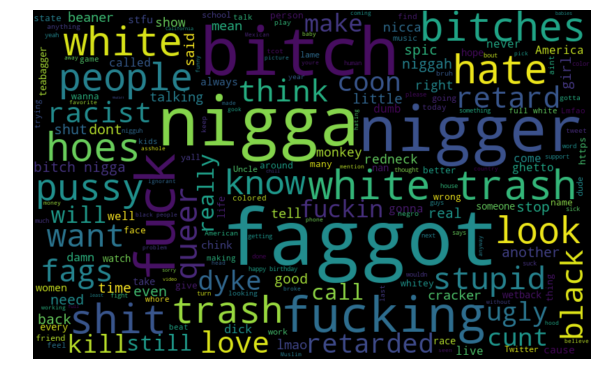

In [8]:
from wordcloud import WordCloud

df_0_words = ' '.join([str(text) for text in df['tidy_tweet'][df['class']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=10, max_font_size=110).generate(df_0_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
df_0_words

'queer gaywad alsarabsss beaner tell mexican fucking blacklisted Holding #TehGodClan anyway http xUCcwoetmn LMFAOOOO HATE BLACK PEOPLE https RNvD nLCDR This there black people niggers least nigger http RGJa CfoiT Lmfao Ariza snake coward least cripple like your hero Roach lmaoo Drakes shoes that will released Nike Jordan there glitter shoes http QCtPLxHEXM dudes #GerrysHalloweenParty http ycrSrnjHc Halloween yesterday stupid nigger bored supposed cute faggot Sometimes lassen coach wants feel youll more doubt Jackies retard #blondeproblems least make grilled cheese Stacey Dash http PDLG rjOL baddest bitch evaaaa worry about nigga worry about nigga nigga fuckin bitch look that video that found kidnapped girls Ohio what nigger #shitmybosssays kill cracker babies just hear grandma used call porch monkey time Come think refer broken bottle nigger knife thought some photoshopped face that faggot smmfh hate yall http people time Aryan race stand more Before mongerls turn world into ghetto slu

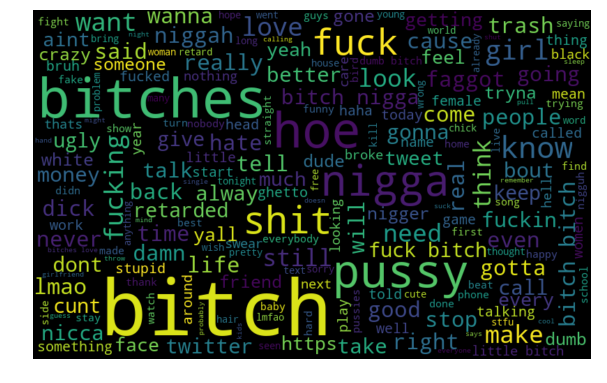

In [21]:
df_1_words = ' '.join([str(text) for text in df['tidy_tweet'][df['class']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=210, max_font_size=110).generate(df_1_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
df_1_words

'dats cold tyga cuffin place Dawg ever fuck bitch start confused shit look like tranny shit hear about might true might faker than bitch told shit just blows claim faithful down somebody still fucking with hoes just HATE another bitch much shit going cause tired bitches coming skinny girls might bitch back thats that hobbies include fighting Mariam bitch Keeks bitch curves everyone walked into conversation like this Murda Gang bitch Gang Land hoes that smoke losers bitches only thing that like bitch bitch nigga miss with bitch whatever bitch love bitches everyday black bottle bitch broke bitch cant tell nothing cancel that bitch like Nino cant these hoes wont change fuck that bitch dont even suck dick Kermit videos bout fuck bitch toeing hardwood floors http pussy lips like Heaven doors what hitting that pussy Ocean gave that pussy pill need trippy bitch fuck Hennessy spend money want bitch business bitch bitch pussy wetter back bitches would excited aint bout that Murder Game pussy ni

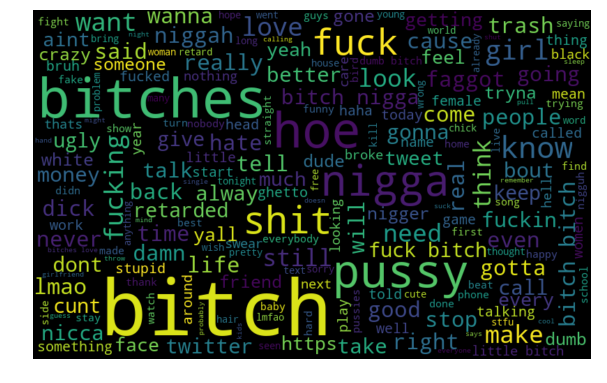

In [23]:
df_2_words = ' '.join([str(text) for text in df['tidy_tweet'][df['class']==2]])

wordcloud = WordCloud(width=800, height=500, random_state=210, max_font_size=110).generate(df_1_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
df_2_words

'woman shouldn complain about cleaning your house should always take trash momma said pussy cats inside doghouse SimplyAddictedToGuys http woof woof scally http gzUpfuMev woof woof soles Lemmie Oreo these dishes oreo eggplant emoji looked like scream lmao baby monkey bathtime http KPWAdLF Awwwwe This soooo ADORABLE Baseball season #Yankees This where love started early bird night wise have worms Overdosing heavy drugs doesn sound tonight that pussy shit every Bulls Photographed Lovely Fairy Tale Creatures http oOLh They fairy tale creatures long Lakers trash from could careless that real hahaha this play soccer cheat girls wear khaki coloured cargos haircut http ZUai qWBIR This ghetto smart https MPAzQ Jswf doing this wants there nose these bois then #scally #chav #sockfetish #stinking http FeQxgN legs Peel peel bring back rewind back where from they move Shaq from line ooooow said that trash #UCFPINKPARTY come stay alive knights nation This still early bird special #ComeAtMeUT Stay tu

In [29]:
# function to collect hashtags
def hashtag_extract(tweet):
    hashtags = []
    # Loop over the words in the tweet
    for word in tweet:
        ht = re.findall(r"#(\w+)", str(word))
        hashtags.append(ht)

    return hashtags

In [31]:
# extracting hashtags from non racist/sexist tweets
HT_0 = hashtag_extract(df['tidy_tweet'][df['class']==0])

HT_1 = hashtag_extract(df['tidy_tweet'][df['class']==1])

HT_2 = hashtag_extract(df['tidy_tweet'][df['class']==2])


In [32]:
HT_0

[[],
 [],
 ['TehGodClan'],
 [],
 [],
 [],
 [],
 ['GerrysHalloweenParty'],
 [],
 [],
 ['blondeproblems'],
 [],
 [],
 ['shitmybosssays'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['AZmonsoon', 'Tcot', 'teaparty', 'azflooding'],
 ['California'],
 ['California', 'Oklahoma'],
 ['DTLA'],
 ['Dutch'],
 ['Dutch', 'NewYorkCity'],
 ['Iowa'],
 ['JesusChrist', 'faggots', 'PERIOD', 'SonOfGod'],
 ['Minnesota'],
 ['ReasonsWeCantBeTogether'],
 ['RebelScience', 'faggot', 'rome'],
 ['SlightlyAdjusted'],
 ['SomethingIGetAlot'],
 ['SouthCarolina'],
 ['ThingsIWillTeachMyChild'],
 ['TrayvonMartin'],
 ['TweetLikePontiacHolmes'],
 ['VinitaHegwood', 'tcot'],
 ['Virginia'],
 ['WestVirginia'],
 ['faggots', 'scientific', 'cancer'],
 ['firefighter'],
 ['milesthompson', 'goauche', 'wetback'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['dope'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['RealTalk'],
 [],
 [],
 ['fag

In [33]:
# unnesting lists
HT_0 = sum(HT_0,[])
HT_1 = sum(HT_1,[])
HT_2 = sum(HT_2,[])

In [34]:
HT_0

['TehGodClan',
 'GerrysHalloweenParty',
 'blondeproblems',
 'shitmybosssays',
 'AZmonsoon',
 'Tcot',
 'teaparty',
 'azflooding',
 'California',
 'California',
 'Oklahoma',
 'DTLA',
 'Dutch',
 'Dutch',
 'NewYorkCity',
 'Iowa',
 'JesusChrist',
 'faggots',
 'PERIOD',
 'SonOfGod',
 'Minnesota',
 'ReasonsWeCantBeTogether',
 'RebelScience',
 'faggot',
 'rome',
 'SlightlyAdjusted',
 'SomethingIGetAlot',
 'SouthCarolina',
 'ThingsIWillTeachMyChild',
 'TrayvonMartin',
 'TweetLikePontiacHolmes',
 'VinitaHegwood',
 'tcot',
 'Virginia',
 'WestVirginia',
 'faggots',
 'scientific',
 'cancer',
 'firefighter',
 'milesthompson',
 'goauche',
 'wetback',
 'dope',
 'RealTalk',
 'faggot',
 'Respect',
 'wcw',
 'Ferguson',
 'CredibilityShot',
 'FergusonRiot',
 'Justice',
 'butthurt',
 'hesgay',
 'ISIS',
 'faggot',
 'LORDWILLIN',
 'dummies',
 'niggerfood',
 'niggerperson',
 'you',
 'are',
 'nigger',
 'TwitterHoney',
 'SorryNotSorry',
 'swaagg',
 'fazeisgay',
 'Cali',
 'okiecops',
 'justsayin',
 'racist',
 'tr

In [35]:
HT_1

['Shots',
 'SevenOne',
 'HappyHumpDay',
 'ahmesehwetness',
 'Eaglesnation',
 'Eagles',
 'EarlyChristmas',
 'StopWhitePeople',
 'CowboysNation',
 'FreeMoneyMelle',
 'oomf',
 'fixed',
 'KingOfTheHill',
 'WutKinda',
 'hoesaintloyal',
 'real',
 'Pisces',
 'NewSATQuestions',
 'MTVHottest',
 'Damn',
 'GodProtectsHisAngels',
 'scally',
 'sneakersex',
 'sockfetish',
 'sniff',
 'trainersex',
 'WWYD',
 'YoureNotMyType',
 'chav',
 'FreshRhymes',
 'JerkSquad',
 'SlowStir',
 'beforeiselfdestruct',
 'ThankYouPaulForConfirmingLarry',
 'NottingHill',
 'RIPTALLT',
 'Tupac',
 'smile',
 'remix',
 'afterearth',
 'SNL',
 'hoes',
 'ShitFahdSays',
 'redskins',
 'NFL',
 'concussion',
 'jokes',
 'fuckgm',
 'AlexFromTarget',
 'ChrisFromWalmart',
 'AlexFromTarget',
 'AnnCoulter',
 'Obama',
 'Syria',
 'cunt',
 'AsAGiraffes',
 'BOB',
 'BangBangBirdGang',
 'Bartending',
 'bartender',
 'BestSongToHaveSexTo',
 'bangbang',
 'BitchSlapThursdays',
 'Bout',
 'AintNoLevelz',
 'BurnNotice',
 'CelebrityLeakedPhotos',
 'NSA'

In [36]:
HT_2

['Yankees',
 'scally',
 'chav',
 'sockfetish',
 'stinking',
 'UCFPINKPARTY',
 'ComeAtMeUT',
 'bum',
 'Climate',
 'Yankees',
 'RALLYCAP',
 'redneck',
 'ProtectTheAnimals',
 'History',
 'Photography',
 'frenchscally',
 'shitallysays',
 'Snoop',
 'Justin',
 'BETAwards',
 'AskDems',
 'BREAKING',
 'BigBird',
 'BlessJesus',
 'BlessJesus',
 'BlessJesus',
 'Crown',
 'BlessJesusAir',
 'BlessJesusLove',
 'Strong',
 'CommonQuestionIGet',
 'DegenerateArtist',
 'climatechange',
 'DerekJeter',
 'Yankees',
 'FirstBallot',
 'Unanimous',
 'EarlyBird',
 'early',
 'morning',
 'sunrise',
 'dawn',
 'bird',
 'thebird',
 'jerryreed',
 'Ebola',
 'Ebola',
 'GOP',
 'teaparty',
 'Tcot',
 'teabaggers',
 'ExplainAnAnimePlotBadly',
 'FemaleLogic',
 'FireCashman',
 'Yankees',
 'Glory',
 'HOLIDAYSEASONLIVE',
 'HappyColumbusDay',
 'America',
 'KarlMarx',
 'colonialism',
 'injuns',
 'HappyColumbusDay',
 'PETA',
 'buffalo',
 'injuns',
 'HellYeah',
 'HelloBrookland',
 'HolySpirit',
 'college',
 'hoosiernation',
 'hoosier

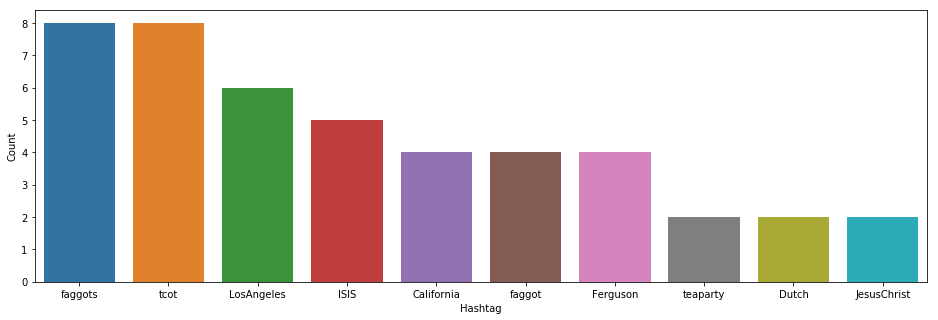

In [38]:
a = nltk.FreqDist(HT_0)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

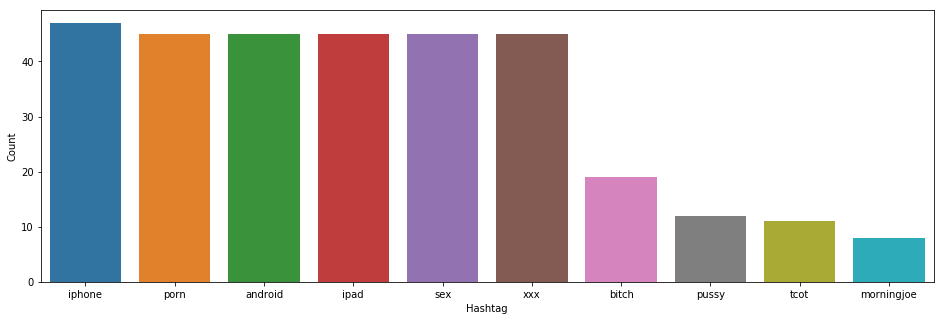

In [39]:
b = nltk.FreqDist(HT_1)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

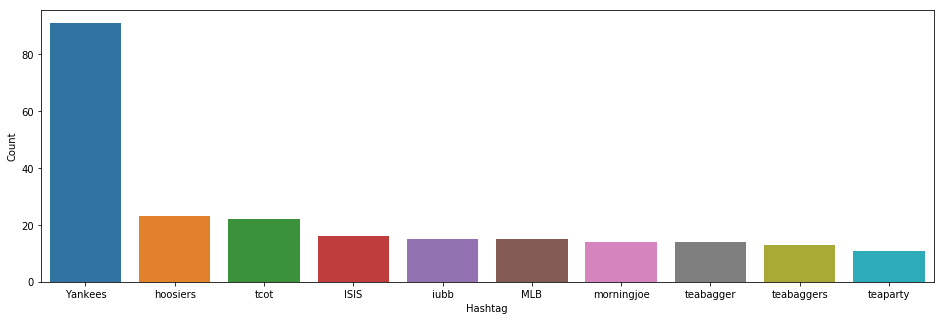

In [40]:
b = nltk.FreqDist(HT_2)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [62]:
df_0 = df[df['class']==0]
df_1 = df[df['class']==1]
df_2 = df[df['class']==2]

In [63]:
list_0 = sum(df_0.tokenized_tweet,[])
list_1 = sum(df_1.tokenized_tweet,[])
list_2 = sum(df_2.tokenized_tweet,[])

TypeError: can only concatenate list (not "str") to list

In [56]:
meta_freqdist_0 = FreqDist(df_0.tokenized_tweet)
meta_freqdist_0.most_common(10)

[("['faggot']", 14),
 ('[]', 13),
 ("['fags']", 6),
 ("['nigger']", 5),
 ("['niggers']", 3),
 ("['Shoot', 'that', 'nigga', 'shorty', 'bitch']", 2),
 ("['cunt']", 2),
 ("['Whatever', 'Fuck', 'those', 'assholes', 'They', 'niggers', 'they', 'look', 'alike']",
  2),
 ("['happy', 'birthday', 'faggot']", 2),
 ("['retard']", 2)]

In [54]:
meta_freqdist_1 = FreqDist(df_1.tidy_tweet)
meta_freqdist_1.most_common(10)

[('bitch', 151),
 (nan, 56),
 ('pussy', 54),
 ('bitches', 18),
 ('hoes', 16),
 ('These hoes loyal', 15),
 ('faggot', 15),
 ('fuck bitch', 14),
 ('that bitch', 9),
 ('love these hoes', 9)]

In [55]:
meta_freqdist_2 = FreqDist(df_2.tidy_tweet)
meta_freqdist_2.most_common(10)

[('trash', 22),
 (nan, 10),
 ('Charlie', 7),
 ('girl tweeted might ghetto bring food from outside into movies might stupid',
  3),
 ('when other girls wear beanies they look cute stylish when wear them look like member drug cartel',
  3),
 ('mans trash another mans treasure', 2),
 ('only back cause wanna boys lose trash #vote', 2),
 ('east coast there colored hair everywhere This must sweetest wave ever', 2),
 ('nudes trash', 2),
 ('moke', 2)]

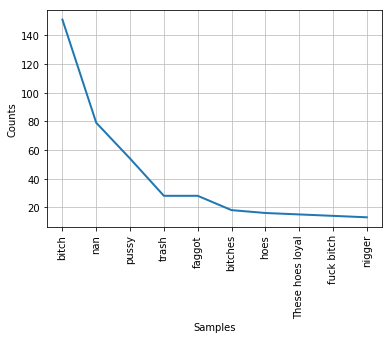

In [27]:
meta_freqdist_0.plot(10,cumulative=False)

## Bigram

In [47]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
meta_finder = BigramCollocationFinder.from_words(df['no_hash_tweet'])


In [51]:
meta_finder

In [50]:
bigram_scored = meta_finder.score_ngrams(bigram_measures.raw_freq)


TypeError: '<' not supported between instances of 'float' and 'str'

In [665]:
bigram_scored

[(('model i love u take with u all the time in ur',
   'model i love u take with u all the time in ur'),
  0.00012514861397910017),
 (('you might be a libtard if libtard sjw liberal politics',
   'i finally found a way how to delete old tweets you might find it useful as well deletetweets'),
  9.386146048432514e-05),
 (('i am thankful for tears thankful positive',
   'model i love u take with u all the time in ur'),
  6.257430698955009e-05),
 (('i finally found a way how to delete old tweets you might find it useful as well deletetweets',
   'vehicle gorilla simulator you need to do to adapt to the environment the need to tear the city materia'),
  6.257430698955009e-05),
 (('model i love u take with u all the time in ur',
   'i m so and grateful now that affirmations'),
  6.257430698955009e-05),
 (('parente bull up you will dominate your bull and you will direct it whatever you want it to do when you',
   'model i love u take with u all the time in ur'),
  6.257430698955009e-05),
 (('